In [1]:
###Importing Required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics

In [2]:
Df = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_cleaned_labelled.csv')

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


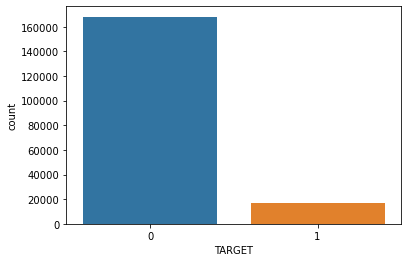

In [3]:
sns.countplot(Df["TARGET"])
plt.show()

In [3]:
Df.shape

(185176, 60)

In [4]:
Df["TARGET"].value_counts()

0    168113
1     17063
Name: TARGET, dtype: int64

In [5]:
17063/168113*100

10.149720723560938

## Checking datatypes of Varaiables

In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185176 entries, 0 to 185175
Data columns (total 60 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             185176 non-null  int64  
 1   SK_ID_CURR             185176 non-null  int64  
 2   TARGET                 185176 non-null  int64  
 3   NAME_CONTRACT_TYPE     185176 non-null  int64  
 4   CODE_GENDER            185176 non-null  int64  
 5   FLAG_OWN_CAR           185176 non-null  int64  
 6   FLAG_OWN_REALTY        185176 non-null  int64  
 7   AMT_INCOME_TOTAL       185176 non-null  float64
 8   AMT_CREDIT             185176 non-null  float64
 9   AMT_ANNUITY            185176 non-null  float64
 10  AMT_GOODS_PRICE        185176 non-null  float64
 11  FLAG_MOBIL             185176 non-null  int64  
 12  FLAG_EMP_PHONE         185176 non-null  int64  
 13  FLAG_WORK_PHONE        185176 non-null  int64  
 14  FLAG_CONT_MOBILE       185176 non-nu

In [7]:
Numerical_Columns = Df.select_dtypes(include=("int64"))
Cat_columns = Df.select_dtypes(include=("float64"))

In [8]:
Df.isnull().sum()

Unnamed: 0               0
SK_ID_CURR               0
TARGET                   0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY              0
AMT_GOODS_PRICE          0
FLAG_MOBIL               0
FLAG_EMP_PHONE           0
FLAG_WORK_PHONE          0
FLAG_CONT_MOBILE         0
FLAG_PHONE               0
FLAG_EMAIL               0
AGE                      0
EMPLOYMENT_AGE           0
REGISTRATION_AGE         0
previous_loan_counts     0
NO_OF_PREV_APP           0
CNT_CHILDREN_0           0
CNT_CHILDREN_1           0
CNT_CHILDREN_2           0
CNT_CHILDREN_3           0
CNT_CHILDREN_4           0
CNT_CHILDREN_5           0
CNT_CHILDREN_6           0
NAME_TYPE_SUITE_0.0      0
NAME_TYPE_SUITE_1.0      0
OCCUPATION_TYPE_0        0
OCCUPATION_TYPE_1        0
OCCUPATION_TYPE_2        0
OCCUPATION_TYPE_3        0
CNT_FAM_MEMBERS_1.0      0
CNT_FAM_MEMBERS_2.0      0
C

## Dropping Redundant Variables

In [9]:
New_df = Df.drop(["Unnamed: 0"],axis=1)
New_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
0,100002,1,0,0,0,1,202500.0,406597.5,24700.5,351000.0,...,0,1,0,0,1,0,0,1,0,0
1,100003,0,0,1,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,1,0,0,1,0,0,0,1
2,100004,0,1,0,1,1,67500.0,135000.0,6750.0,135000.0,...,0,1,0,0,1,0,0,1,0,0
3,100007,0,0,0,0,1,121500.0,513000.0,21865.5,513000.0,...,0,1,0,0,1,0,0,1,0,0
4,100008,0,0,0,0,1,99000.0,490495.5,27517.5,454500.0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185171,456245,0,0,1,0,1,81000.0,269550.0,11871.0,225000.0,...,0,1,0,0,1,0,0,0,0,1
185172,456247,0,0,1,0,1,112500.0,345510.0,17770.5,247500.0,...,0,1,0,0,0,1,0,1,0,0
185173,456253,0,0,1,0,1,153000.0,677664.0,29979.0,585000.0,...,0,1,0,0,0,1,0,0,1,0
185174,456254,1,0,1,0,1,171000.0,370107.0,20205.0,319500.0,...,0,1,0,0,1,0,0,0,0,1


## CHecking Correlation

In [10]:
New_df.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
SK_ID_CURR,1.000000,-0.001960,0.000950,-0.000540,0.003760,-0.001061,0.002785,0.001279,0.000166,0.001300,...,0.002224,-0.001548,0.001534,0.003303,-0.000456,-0.001265,0.002379,0.002260,-0.000686,-0.001495
TARGET,-0.001960,1.000000,-0.037410,-0.047091,-0.037264,-0.001746,-0.033961,-0.043188,-0.019965,-0.053267,...,0.003587,0.031554,-0.031561,0.006708,0.070569,-0.076922,-0.005376,0.027953,-0.006097,-0.020018
NAME_CONTRACT_TYPE,0.000950,-0.037410,1.000000,0.024070,-0.007476,0.076300,-0.016471,-0.238901,-0.270626,-0.201203,...,0.013960,0.012625,-0.013045,0.001016,-0.055666,0.057668,0.002817,0.039376,-0.000130,-0.033596
CODE_GENDER,-0.000540,-0.047091,0.024070,1.000000,-0.322157,0.036593,-0.164151,-0.008388,-0.065143,-0.009811,...,0.003556,-0.059420,0.059487,-0.017332,-0.044549,0.055224,-0.001385,-0.035221,0.107473,-0.038456
FLAG_OWN_CAR,0.003760,-0.037264,-0.007476,-0.322157,1.000000,0.015041,0.171789,0.105987,0.126904,0.110529,...,-0.001879,0.015864,-0.015743,-0.004803,-0.068729,0.074377,-0.000484,-0.072556,-0.080944,0.113710
FLAG_OWN_REALTY,-0.001061,-0.001746,0.076300,0.036593,0.015041,1.000000,0.011306,-0.041576,-0.000039,-0.047261,...,0.002864,0.014152,-0.014159,-0.024208,0.021362,-0.010678,0.002678,-0.045241,0.009504,0.032631
AMT_INCOME_TOTAL,0.002785,-0.033961,-0.016471,-0.164151,0.171789,0.011306,1.000000,0.325711,0.397598,0.333209,...,-0.004844,-0.012311,0.012445,-0.001312,-0.190709,0.199567,0.016078,-0.007926,-0.001146,0.007511
AMT_CREDIT,0.001279,-0.043188,-0.238901,-0.008388,0.105987,-0.041576,0.325711,1.000000,0.759681,0.985667,...,-0.003713,-0.043662,0.043843,-0.028782,-0.111792,0.130782,0.007728,-0.106797,-0.034830,0.113571
AMT_ANNUITY,0.000166,-0.019965,-0.270626,-0.065143,0.126904,-0.000039,0.397598,0.759681,1.000000,0.762354,...,-0.006314,-0.022368,0.022574,-0.014150,-0.123242,0.135602,0.008018,-0.078901,-0.051442,0.100311
AMT_GOODS_PRICE,0.001300,-0.053267,-0.201203,-0.009811,0.110529,-0.047261,0.333209,0.985667,0.762354,1.000000,...,-0.002054,-0.042858,0.042998,-0.028149,-0.125687,0.144991,0.008420,-0.106896,-0.037774,0.115533


## Correlation with Respect TO Target variable

In [11]:
New_df.corr()["TARGET"]

SK_ID_CURR              -0.001960
TARGET                   1.000000
NAME_CONTRACT_TYPE      -0.037410
CODE_GENDER             -0.047091
FLAG_OWN_CAR            -0.037264
FLAG_OWN_REALTY         -0.001746
AMT_INCOME_TOTAL        -0.033961
AMT_CREDIT              -0.043188
AMT_ANNUITY             -0.019965
AMT_GOODS_PRICE         -0.053267
FLAG_MOBIL               0.000740
FLAG_EMP_PHONE          -0.000200
FLAG_WORK_PHONE          0.020302
FLAG_CONT_MOBILE         0.001622
FLAG_PHONE              -0.021338
FLAG_EMAIL              -0.008326
AGE                     -0.055971
EMPLOYMENT_AGE          -0.072086
REGISTRATION_AGE        -0.014340
previous_loan_counts    -0.013027
NO_OF_PREV_APP           0.023085
CNT_CHILDREN_0           0.001515
CNT_CHILDREN_1          -0.000118
CNT_CHILDREN_2          -0.004814
CNT_CHILDREN_3           0.004244
CNT_CHILDREN_4           0.006794
CNT_CHILDREN_5          -0.000171
CNT_CHILDREN_6           0.004016
NAME_TYPE_SUITE_0.0      0.008176
NAME_TYPE_SUIT

## Handling inbalanced dataset

In [12]:
New_df_majority = New_df[(New_df["TARGET"]==0)]
New_df_minority = New_df[(New_df["TARGET"]==1)]

In [13]:
from sklearn.utils import resample

New_df_minority_upsampled = resample(New_df_minority,
                                    replace = True,
                                    n_samples = 168113, 
                                    random_state = 50)

In [14]:
New_df_upsampled = pd.concat([New_df_majority,New_df_minority_upsampled ])
New_df_upsampled

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
1,100003,0,0,1,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,1,0,0,1,0,0,0,1
2,100004,0,1,0,1,1,67500.0,135000.0,6750.0,135000.0,...,0,1,0,0,1,0,0,1,0,0
3,100007,0,0,0,0,1,121500.0,513000.0,21865.5,513000.0,...,0,1,0,0,1,0,0,1,0,0
4,100008,0,0,0,0,1,99000.0,490495.5,27517.5,454500.0,...,0,0,1,0,1,0,0,0,0,1
5,100009,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35324,168051,1,0,1,0,0,135000.0,1096020.0,52857.0,900000.0,...,0,1,0,0,1,0,0,0,0,1
159723,407398,1,0,1,1,0,67500.0,143910.0,14233.5,135000.0,...,0,1,0,0,1,0,0,0,0,1
160830,409582,1,0,1,0,0,67500.0,521280.0,28278.0,450000.0,...,0,0,1,0,1,0,0,0,0,1
98060,288605,1,0,0,0,1,202500.0,1102500.0,35694.0,1102500.0,...,0,1,0,0,1,0,0,0,1,0


In [15]:
New_df_upsampled["TARGET"].value_counts()

0    168113
1    168113
Name: TARGET, dtype: int64

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


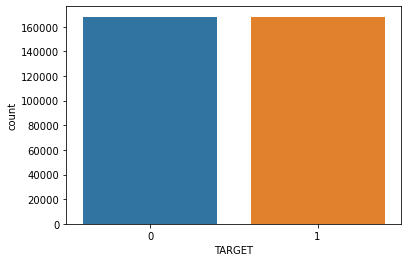

In [16]:
sns.countplot(New_df_upsampled["TARGET"])
plt.show()

## Exporting to CSV

In [17]:
New_df_upsampled.to_csv("/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv")